Importing required modules for data manipulation and visiualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Optional: Set plot styles
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

Reading Black Friday Sales dataset

In [2]:
df = pd.read_csv("BlackFriday.csv")
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


DATA PREPROCESSING
- Information about dataset

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


This means that the columns Product_Category_2,Product_Category_3 contain 173638,383247 null values respectively

In [5]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

- count of unique value of individual columns

In [7]:
for i in df.columns:
    print(i,":",df[i].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


In [8]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Renaming columns

In [9]:
df.rename(columns={"City_Category":"City",
                   "Stay_In_Current_City_Years":"Duration",
                   "Product_Category_1":"Product 1",
                   "Product_Category_2":"Product 2",
                   "Product_Category_3":"Product 3"},inplace=True)
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City',
       'Duration', 'Marital_Status', 'Product 1', 'Product 2', 'Product 3',
       'Purchase'],
      dtype='object')

- Checking for duplicate records

In [10]:
df.duplicated().value_counts()

False    537577
Name: count, dtype: int64

This infers that there are no duplicate records in the dataset

- Individual column processing

In [11]:
df.Gender.value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

Gender column consists of only two values "M" and "F" and do not have any null values, which is the required format so we do not need to make any changes

In [12]:
df.Age.value_counts()

Age
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: count, dtype: int64

Here we will convert the range of age to categories;

0-25 : Adult

26-50 : Middle-aged

51+ : Old-aged

In [13]:
df.replace({"Age":{
    "0-17":"Adult","18-25":"Adult",
    "26-35":"Middle-aged","36-45":"Middle-aged","46-50":"Middle-aged",
    "51-55":"Old-aged","55+":"Old-aged"}},inplace=True)
df.Age.value_counts()

Age
Middle-aged    366715
Adult          112341
Old-aged        58521
Name: count, dtype: int64

Here we have successfully classified the age groups in three categories

In [14]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City,Duration,Marital_Status,Product 1,Product 2,Product 3,Purchase
0,1000001,P00069042,F,Adult,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,Adult,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Adult,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,Adult,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,Old-aged,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,Middle-aged,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,Middle-aged,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,Middle-aged,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,Middle-aged,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,Middle-aged,20,A,1,1,8,NaN,NaN,7871


Removing the "+" symbol in Duration column 

In [15]:
df.Duration = df.Duration.str.replace("+","")

In [16]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City,Duration,Marital_Status,Product 1,Product 2,Product 3,Purchase
0,1000001,P00069042,F,Adult,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,Adult,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Adult,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,Adult,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,Old-aged,16,C,4,0,8,NaN,NaN,7969
5,1000003,P00193542,M,Middle-aged,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,Middle-aged,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,Middle-aged,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,Middle-aged,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,Middle-aged,20,A,1,1,8,NaN,NaN,7871


In [17]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City,Duration,Marital_Status,Product 1,Product 2,Product 3,Purchase
0,1000001,P00069042,F,Adult,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,Adult,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Adult,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,Adult,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,Old-aged,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,Middle-aged,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,Middle-aged,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,Middle-aged,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,Middle-aged,16,C,1,0,5,NaN,NaN,7172


Here we have successfully removed the + symbol from duration column

- Processing null values
Only columns Product_Category_2, Product_Category_3 contain null values , so we will replace null values with 0, assuming 0 stands for Unknown category

In [18]:
a1,b1=[(df[df.loc[:,"City"]=="A"]).groupby("Product 2")["Product 2"].count().idxmax(),(df[df.loc[:,"City"]=="A"]).groupby("Product 3")["Product 3"].count().idxmax()]
a1,b1

(np.float64(8.0), np.float64(16.0))

In [19]:
a2,b2=[(df[df.loc[:,"City"]=="B"]).groupby("Product 2")["Product 2"].count().idxmax(),(df[df.loc[:,"City"]=="B"]).groupby("Product 3")["Product 3"].count().idxmax()]
a2,b2

(np.float64(8.0), np.float64(16.0))

In [20]:
a3,b3=[(df[df.loc[:,"City"]=="C"]).groupby("Product 2")["Product 2"].count().idxmax(),(df[df.loc[:,"City"]=="C"]).groupby("Product 3")["Product 3"].count().idxmax()]
a3,b3

(np.float64(8.0), np.float64(16.0))

In city A,B,C product 2 of category 8 and product 3 of category 16 is purchased maximum number of times , so we will fill all the null values according according to this criteria

<Axes: xlabel='City'>

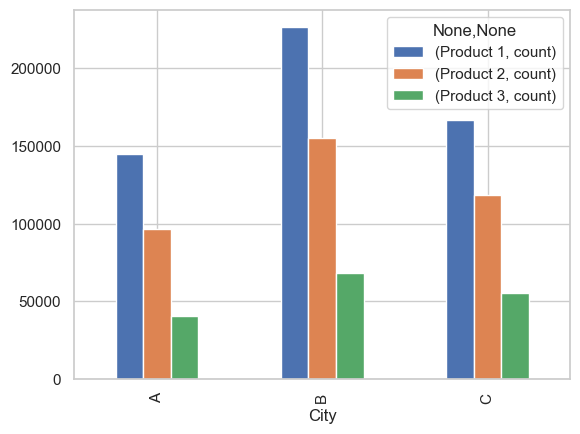

In [21]:
df.loc[:,['City',"Product 1","Product 2","Product 3"]].groupby("City")[["Product 1","Product 2","Product 3"]].agg(["count"]).plot(kind="bar")

Inferences;

Purchase of Product 1 is maximum in all 3 cities
Product 1 is purchased maximum number of times from customers of city B followed by city C and at the last city A
Product 2 is purchased maximum number of times from customers of city B followed by city C and at the last city A
Product 3 is purchased maximum number of times from customers of city B followed by city C and at the last city A

In [22]:
df.loc[(df.loc[:,"City"]=="A") & (df["Product 2"].isnull()),"Product 2"]=a1
df.loc[(df.loc[:,"City"]=="A") & (df["Product 3"].isnull()),"Product 3"]=b1
df.loc[(df.loc[:,"City"]=="B") & (df["Product 2"].isnull()),"Product 2"]=a2
df.loc[(df.loc[:,"City"]=="B") & (df["Product 3"].isnull()),"Product 3"]=b2
df.loc[(df.loc[:,"City"]=="C") & (df["Product 2"].isnull()),"Product 2"]=a3
df.loc[(df.loc[:,"City"]=="C") & (df["Product 3"].isnull()),"Product 3"]=b3

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_ID         537577 non-null  int64  
 1   Product_ID      537577 non-null  object 
 2   Gender          537577 non-null  object 
 3   Age             537577 non-null  object 
 4   Occupation      537577 non-null  int64  
 5   City            537577 non-null  object 
 6   Duration        537577 non-null  object 
 7   Marital_Status  537577 non-null  int64  
 8   Product 1       537577 non-null  int64  
 9   Product 2       537577 non-null  float64
 10  Product 3       537577 non-null  float64
 11  Purchase        537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Here we have successfully handled all the null values

Data Visualization


1.Gender-based Purchase Analysis:

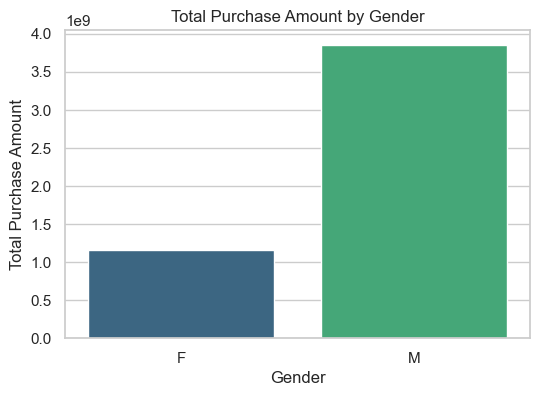

In [24]:
# Gender-based total purchases
gender_purchase = df.groupby('Gender')['Purchase'].sum()

# Plot Gender-based total purchase amount
plt.figure(figsize=(6,4))
sns.barplot(x=gender_purchase.index, y=gender_purchase.values, palette='viridis')
plt.title('Total Purchase Amount by Gender')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Gender')
plt.show()

Inference:
Male purchase more as compared to Female.


2.Age Group Purchase Patterns:

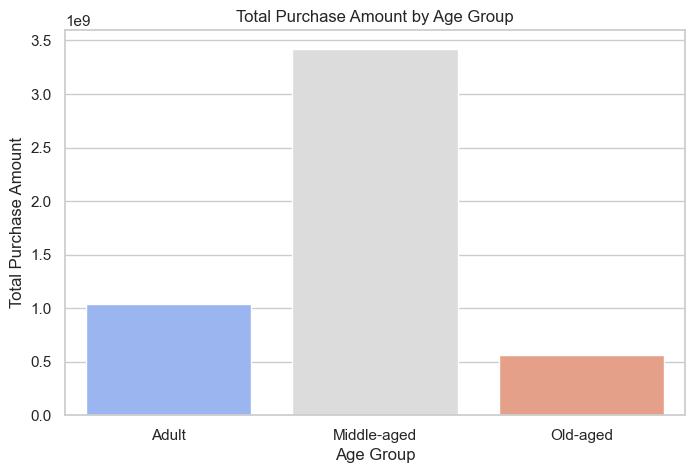

In [25]:
# Age group spending
age_group_purchase = df.groupby('Age')['Purchase'].sum()

# Plot Age group spending
plt.figure(figsize=(8,5))
sns.barplot(x=age_group_purchase.index, y=age_group_purchase.values, palette='coolwarm')
plt.title('Total Purchase Amount by Age Group')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Age Group')
plt.show()

Inference:
Middle-aged age group purchase amount is more followed by adult and at last old-aged

3.Occupation and Purchase Patterns:

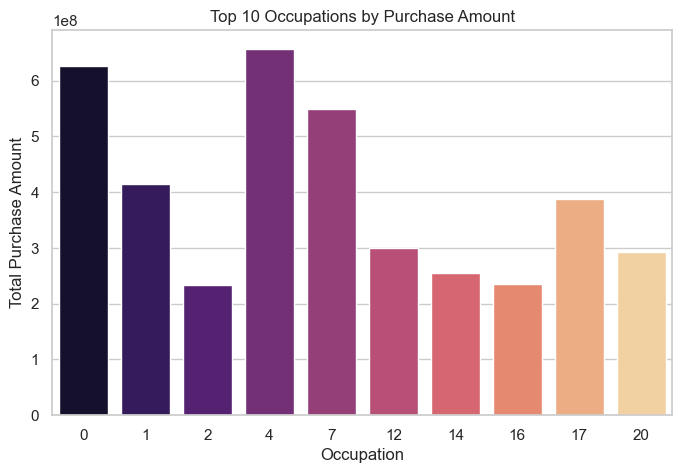

In [26]:
# Top occupations by purchase amount
top_occupations = df.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False).head(10)

# Plot top occupations by purchase
plt.figure(figsize=(8,5))
sns.barplot(x=top_occupations.index, y=top_occupations.values, palette='magma')
plt.title('Top 10 Occupations by Purchase Amount')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Occupation')
plt.show()

Inferences:

Purchase rate of customers from occupation 4,0,7 is the highest

4.City Category and Purchase Patterns:

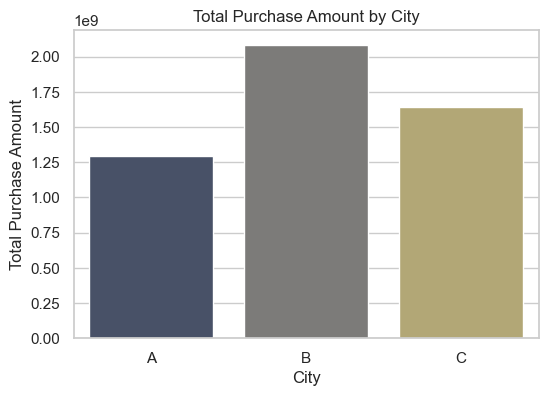

In [27]:
# City category analysis
city_purchase = df.groupby('City')['Purchase'].sum()

# Plot city-based spending
plt.figure(figsize=(6,4))
sns.barplot(x=city_purchase.index, y=city_purchase.values, palette='cividis')
plt.title('Total Purchase Amount by City')
plt.ylabel('Total Purchase Amount')
plt.xlabel('City')
plt.show()

Inference:
Purchase rate of City B is more followed by City A and at last City C

5.Stay Duration and Purchase Patterns:

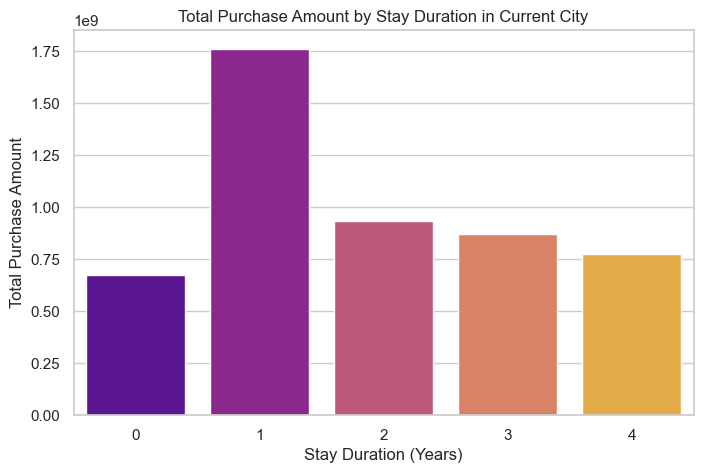

In [28]:
# Stay duration and spending
stay_duration_purchase = df.groupby('Duration')['Purchase'].sum()

# Plot stay duration and spending
plt.figure(figsize=(8,5))
sns.barplot(x=stay_duration_purchase.index, y=stay_duration_purchase.values, palette='plasma')
plt.title('Total Purchase Amount by Stay Duration in Current City')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Stay Duration (Years)')
plt.show()

Cuustomer who have stayed in city for 1 year have more purchase rate.

6.Marital Status and Purchase Behavior

In [29]:
# visualizing the Marital Status

df['Marital_Status'].value_counts()

Marital_Status
0    317817
1    219760
Name: count, dtype: int64

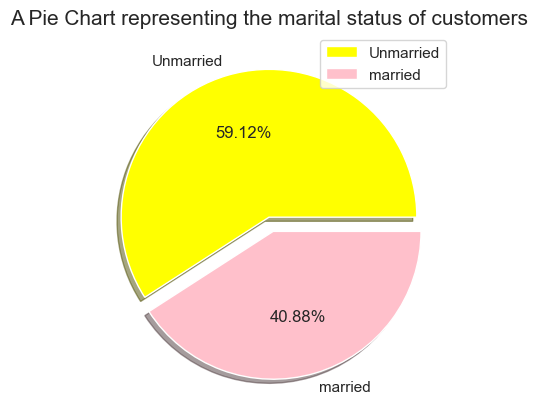

In [33]:
# pie chart 

size = [317817, 219760]
labels = ['Unmarried', 'married']
colors = ['yellow', 'pink']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the marital status of customers', fontsize = 15)
plt.legend()
plt.show()

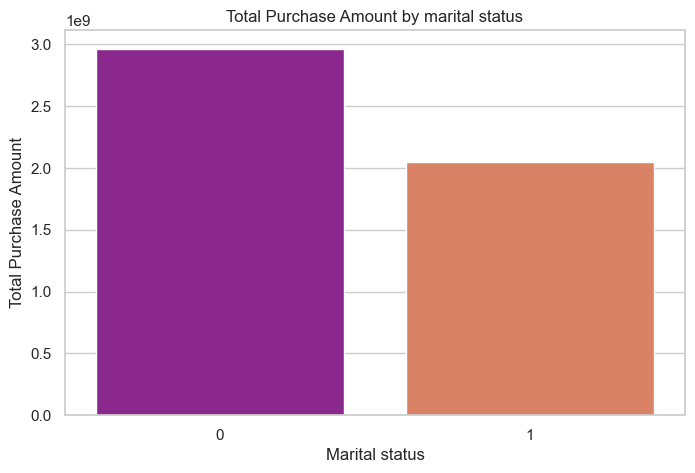

In [31]:
# checking the dependency of marital status on purchasing power

Marital_status_purchase=df.groupby('Marital_Status')['Purchase'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=Marital_status_purchase.index,y=Marital_status_purchase.values, palette='plasma')
plt.title('Total Purchase Amount by marital status')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Marital status')
plt.show()

Inference:

Unmarried population purchasing power is more as compared to married.

3. Product Categories Performance
   
Top Product Categories:

<Axes: xlabel='Product 3', ylabel='Purchase'>

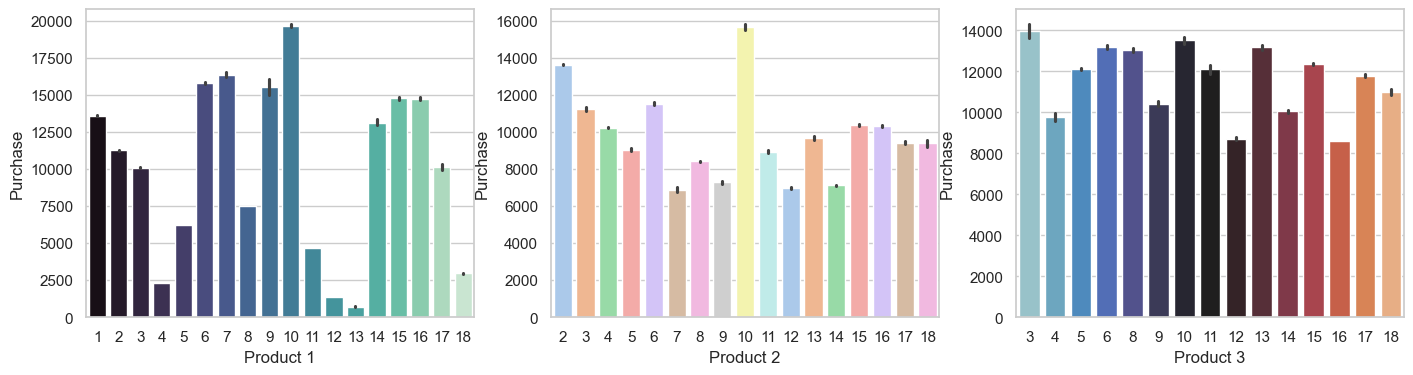

In [32]:
# Top product categories by Purchase amount
plt.figure(figsize=(17,4))
d = df.loc[:,"Product 1":"Purchase"].astype(int)
sns.barplot(x="Product 1",y="Purchase",data=d,ax=plt.subplot(1,3,1),palette="mako")
sns.barplot(x="Product 2",y="Purchase",data=d,ax=plt.subplot(1,3,2),palette="pastel")
sns.barplot(x="Product 3",y="Purchase",data=d,ax=plt.subplot(1,3,3),palette="icefire")

Inferences:

Product 1 of category 10 is purchased most number of times followed by category 7 then 6

Product 2 of category 10 is purchased most number of times followed by category 2 then 6

Product 3 of category 3 is purchased most number of times followed by category 10 then 13

Conclusion:

UnMarried Man belonging to middle-aged age group working in occupation 4 living in City B having stay duration of 1 year are likely to purchase 
Product 1 and Product 2 of category 10 and Product 3 of category 3.